<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/l7_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==1.0.61

  Attempting uninstall: fastai
    Found existing installation: fastai 2.6.3
    Uninstalling fastai-2.6.3:
      Successfully uninstalled fastai-2.6.3


In [ ]:
!pip install ipdb

In [3]:
from fastai import *
from fastai.vision import *
from ipdb import set_trace as st

In [5]:
from fastai.datasets import untar_data
path = untar_data(URLs.PETS)
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [9]:
path_img = path/'images'
path_img.ls()[4203]

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_58.jpg')

In [13]:
path_img.ls()[4203].stem.rsplit('_', 1)[0]

'shiba_inu'

In [15]:
from fastai.vision.data import ImageList
def get_name(im_path):
  return im_path.stem.rsplit('_', 1)[0]

src = ImageList.from_folder(path/'images').split_by_rand_pct(0.2).label_from_func(get_name)


In [20]:
from fastai.vision.transform import get_transforms
data = src.transform(get_transforms(), size = 96).databunch(bs = 64).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:859.)
  return _solve_func(B,A)[0][:,0]


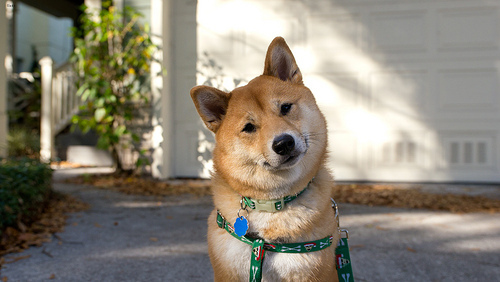

In [18]:
image = open_image(path_img.ls()[4203])
image

In [19]:
image.shape

torch.Size([3, 282, 500])

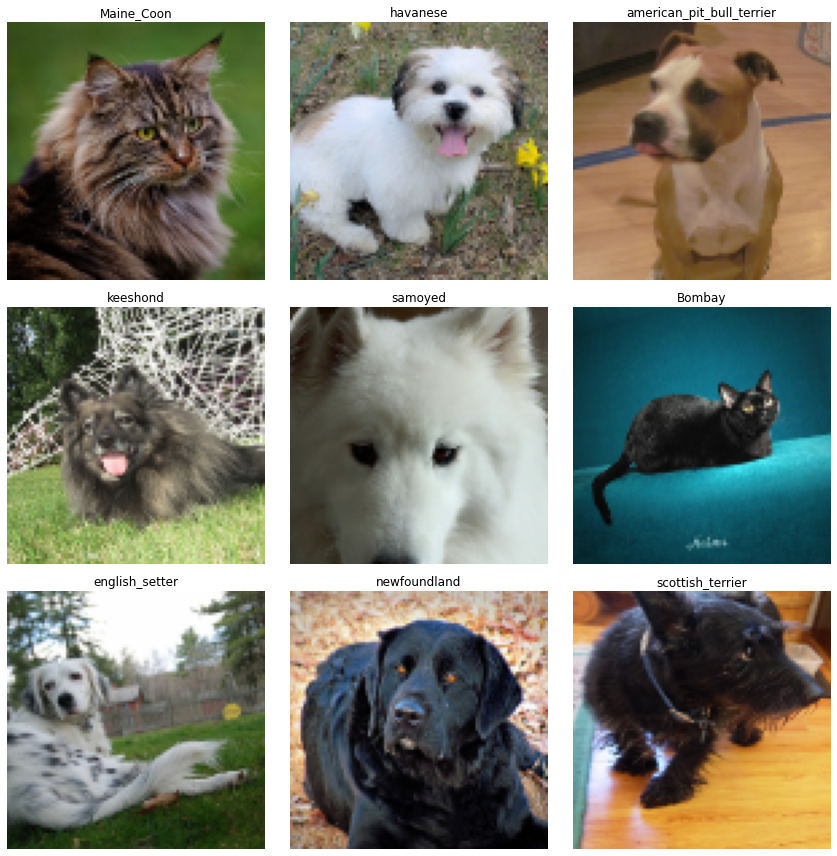

In [22]:
data.show_batch(rows = 3)

In [23]:
from fastai.metrics import accuracy
from fastai.vision.learner import cnn_learner
learn = cnn_learner(data, models.resnet34, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [24]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


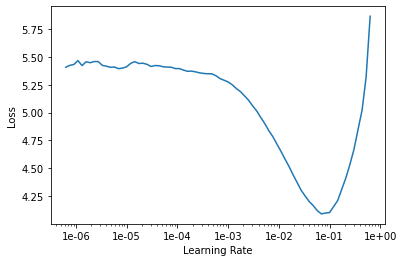

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(4, max_lr = 6e-03)

epoch,train_loss,valid_loss,accuracy,time
0,2.182547,1.267524,0.652233,00:17
1,1.406637,1.120019,0.684709,00:17
2,1.030070,0.749422,0.771313,00:17
3,0.767530,0.708436,0.787551,00:17


In [27]:
learn.save('st_1')
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


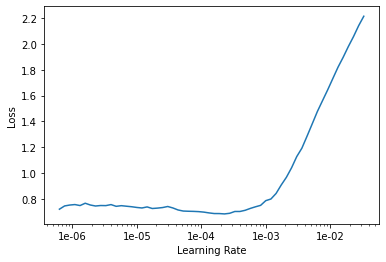

In [28]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.load('st_1')
learn.fit_one_cycle(5, max_lr = 4e-04)
learn.save('st_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.983061,1.567140,0.602842,00:17
1,1.229679,1.103310,0.672530,00:18
2,0.953261,0.926055,0.722598,00:17
3,0.627529,0.689225,0.790934,00:17
4,0.410135,0.632161,0.802436,00:17


In [32]:
learn.load('st_2')
learn.fit_one_cycle(5, max_lr = 2e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.368968,0.697729,0.791610,00:18
1,0.510907,0.864214,0.742219,00:18
2,0.437352,0.701607,0.786198,00:18
3,0.303870,0.601809,0.820704,00:17
4,0.217023,0.567408,0.835589,00:17


In [33]:
learn.save('st_3')

In [34]:
data_160 = src.transform(get_transforms(), size = 160).databunch(bs = 64).normalize(imagenet_stats)

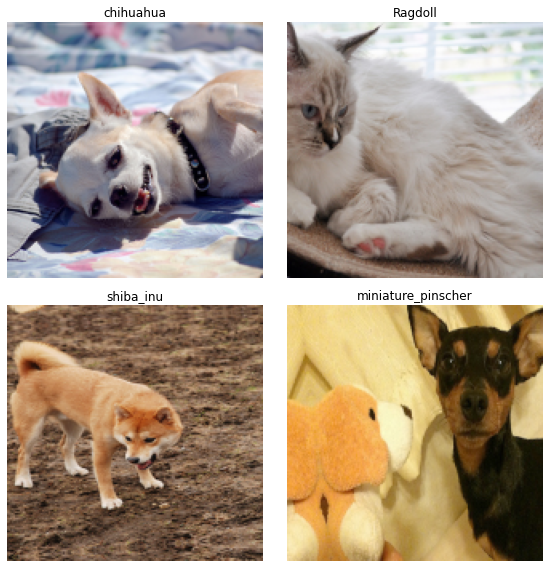

In [36]:
data_160.show_batch(rows = 2)

In [35]:
learn.freeze()
learn.data = data_160

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


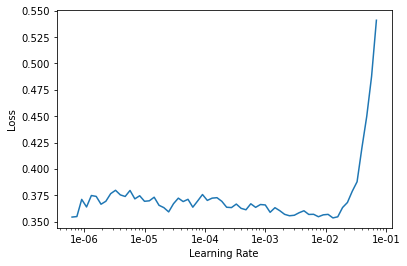

In [38]:
learn.load('st_3')
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.load('st_3')
learn.fit_one_cycle(4, max_lr = 1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.321265,0.360835,0.887010,00:23
1,0.255400,0.365489,0.888363,00:23
2,0.217069,0.355702,0.901218,00:23
3,0.197359,0.342644,0.899188,00:23


In [40]:
learn.save('st_4')
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


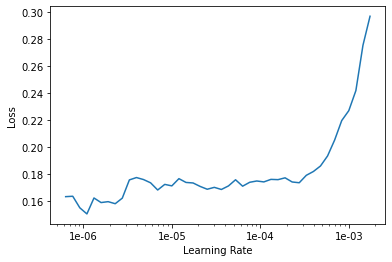

In [41]:
learn.load('st_4')
learn.lr_find()
learn.recorder.plot()

In [42]:
learn.load('st_4')
learn.fit_one_cycle(5, max_lr = 1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.187386,0.388568,0.889716,00:23
1,0.207877,0.438583,0.882273,00:23
2,0.165538,0.371889,0.896482,00:23
3,0.114927,0.334496,0.909337,00:23
4,0.090603,0.327850,0.913396,00:24


(None, None)

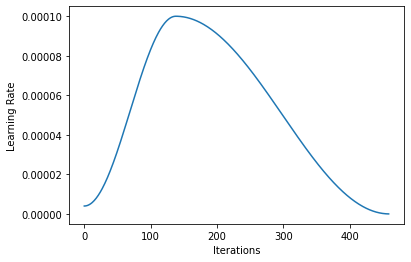

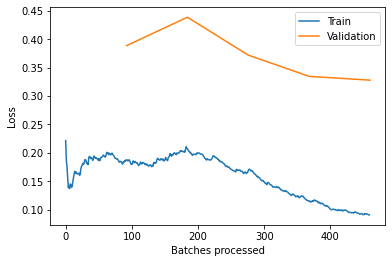

In [46]:
learn.recorder.plot_lr(), learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


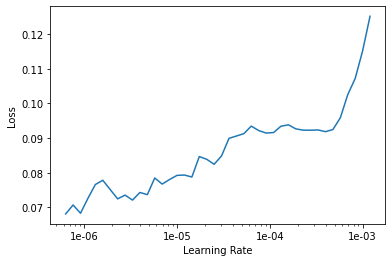

In [48]:
learn.save('st_5')
learn.lr_find()
learn.recorder.plot()

In [49]:
learn.load('st_5')
learn.fit_one_cycle(5, max_lr = 2e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.084933,0.330347,0.914750,00:23
1,0.076660,0.332229,0.905954,00:23
2,0.076203,0.318612,0.911367,00:23
3,0.063663,0.322295,0.914750,00:23
4,0.052190,0.328393,0.913396,00:23


In [ ]:
learn.save('st_6')


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


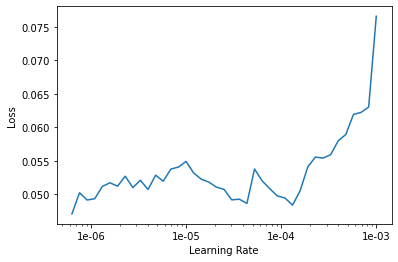

In [50]:
learn.load('st_6')
learn.lr_find()
learn.recorder.plot()

In [54]:
data_224 = src.transform(get_transforms(), size = 224).databunch(bs = 64).normalize(imagenet_stats)

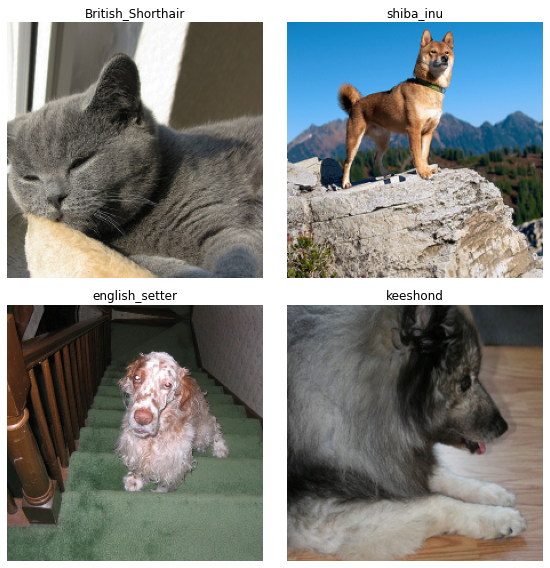

In [55]:
data_224.show_batch(rows = 2)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


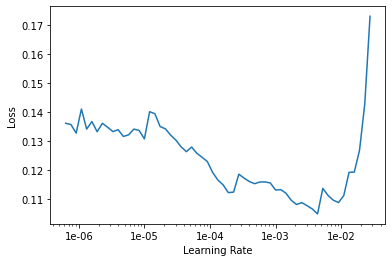

In [59]:
learn.load('st_6')
learn.data = data_224
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [60]:
learn.load('st_6')
learn.fit_one_cycle(4, max_lr = 5e-03 )

epoch,train_loss,valid_loss,accuracy,time
0,0.163539,0.630263,0.849120,00:22
1,0.326289,0.481335,0.883627,00:22
2,0.211843,0.378666,0.900541,00:22
3,0.127289,0.349948,0.903924,00:22


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


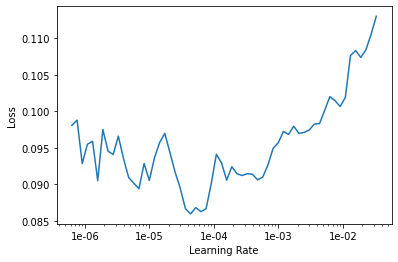

In [61]:
learn.save('st_7')
# learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


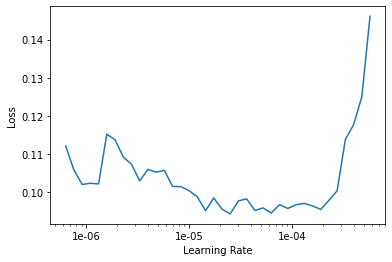

In [62]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [63]:
learn.load('st_7')
learn.fit_one_cycle(5, max_lr = 5e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.108421,0.346371,0.914750,00:22
1,0.111019,0.415952,0.901218,00:22
2,0.098474,0.363307,0.911367,00:22
3,0.075097,0.338877,0.916779,00:22
4,0.058001,0.341443,0.917456,00:22


In [65]:
learn.save('st_8')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


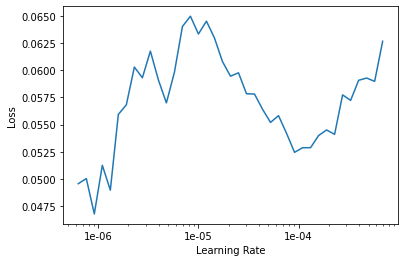

In [64]:
learn.lr_find()
learn.recorder.plot()

In [66]:
learn.load('st_8')
learn.fit_one_cycle(5, max_lr = 3e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.054019,0.335423,0.918809,00:22
1,0.046469,0.332887,0.916779,00:22
2,0.052788,0.329511,0.920162,00:22
3,0.052675,0.336681,0.917456,00:22
4,0.048560,0.330306,0.920162,00:22
